<a href="https://colab.research.google.com/github/xiaorui777/Project/blob/master/pre_trained_model_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip flowers.zip

Archive:  flowers.zip
   creating: flowers/
   creating: flowers/test/
   creating: flowers/test/daisy/
  inflating: flowers/test/daisy/34638378196_216d5bbc2e_n.jpg  
   creating: __MACOSX/
   creating: __MACOSX/flowers/
   creating: __MACOSX/flowers/test/
   creating: __MACOSX/flowers/test/daisy/
  inflating: __MACOSX/flowers/test/daisy/._34638378196_216d5bbc2e_n.jpg  
  inflating: flowers/test/daisy/34542837641_10492bf600_n.jpg  
  inflating: __MACOSX/flowers/test/daisy/._34542837641_10492bf600_n.jpg  
  inflating: flowers/test/daisy/34566613262_fefbcc279a_n.jpg  
  inflating: __MACOSX/flowers/test/daisy/._34566613262_fefbcc279a_n.jpg  
  inflating: flowers/test/daisy/34637970155_a2b917077c_n.jpg  
  inflating: __MACOSX/flowers/test/daisy/._34637970155_a2b917077c_n.jpg  
  inflating: flowers/test/daisy/34522174462_b7cbee3ecb_n.jpg  
  inflating: __MACOSX/flowers/test/daisy/._34522174462_b7cbee3ecb_n.jpg  
  inflating: flowers/test/daisy/34508227161_a9ff840f71_n.jpg  
  inflating: __M

In [0]:
import numpy as np
import pandas as pd
import os

from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

In [0]:
resnet_weights_path = './resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [0]:
train_generator = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range = 0.4,
                                   height_shift_range = 0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   )
image_size = 224
batch_size = 10
train_generator = train_generator.flow_from_directory(
        './flowers/train',
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical')

num_classes = len(train_generator.class_indices)

Found 411 images belonging to 3 classes.


In [0]:
test_generator = ImageDataGenerator()

test_generator = test_generator.flow_from_directory(
        './flowers/test',
        target_size=(image_size, image_size),
        batch_size=batch_size,
        class_mode='categorical')

num_classes = len(train_generator.class_indices)

Found 120 images belonging to 3 classes.


In [0]:
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

W0827 10:56:07.916613 139941650880384 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
count = sum([len(files) for r, d, files in os.walk("./flowers/train/")])

model.fit_generator(
        train_generator,
        steps_per_epoch=int(count/batch_size) + 1,
        epochs=10)

Epoch 1/10
42/42 [==============================] - 99s 2s/step - loss: 1.8562 - acc: 0.7397
Epoch 2/10
42/42 [==============================] - 97s 2s/step - loss: 0.8819 - acc: 0.7956
Epoch 3/10
42/42 [==============================] - 97s 2s/step - loss: 0.5496 - acc: 0.8467
Epoch 4/10
42/42 [==============================] - 96s 2s/step - loss: 0.4956 - acc: 0.8710
Epoch 5/10
42/42 [==============================] - 96s 2s/step - loss: 0.3670 - acc: 0.8759
Epoch 6/10
42/42 [==============================] - 96s 2s/step - loss: 0.4137 - acc: 0.8832
Epoch 7/10
42/42 [==============================] - 96s 2s/step - loss: 0.3249 - acc: 0.8832
Epoch 8/10
42/42 [==============================] - 96s 2s/step - loss: 0.3120 - acc: 0.8978
Epoch 9/10
42/42 [==============================] - 96s 2s/step - loss: 0.2183 - acc: 0.9270
Epoch 10/10
42/42 [==============================] - 96s 2s/step - loss: 0.3042 - acc: 0.9051


In [0]:
from IPython.display import Image, display

import os, random
img_locations = []
for d in os.listdir("./flowers/train/"):
    directory = "./flowers/train/" + d
    sample = [directory + '/' + s for s in random.sample(
        os.listdir(directory), int(random.random()*10))]
    img_locations += sample

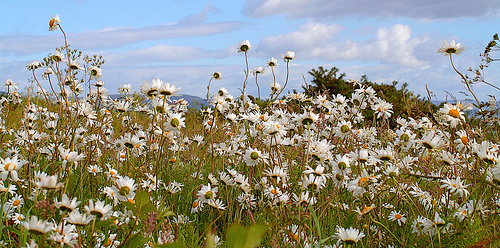

daisy


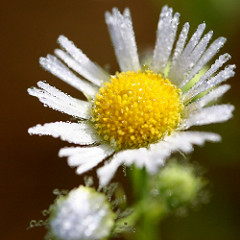

daisy


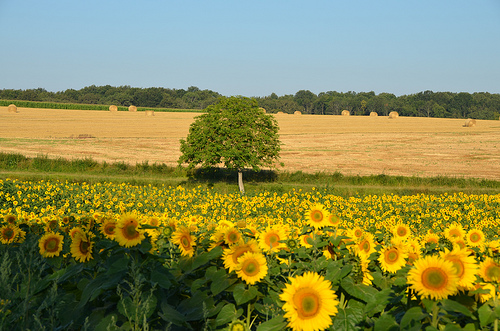

sunflower


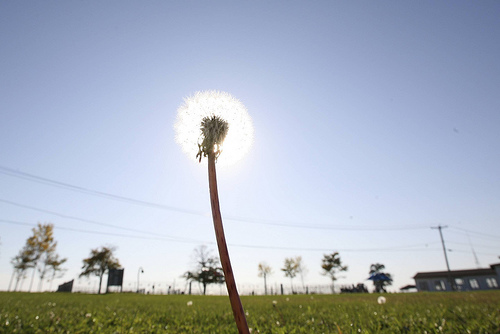

dandelion


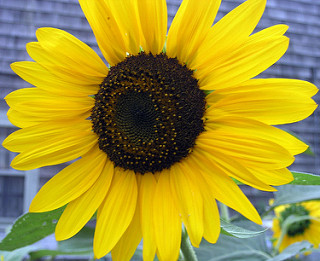

sunflower


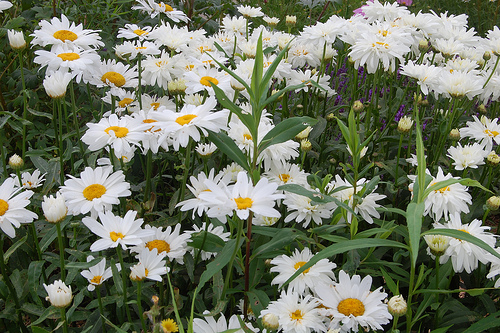

daisy


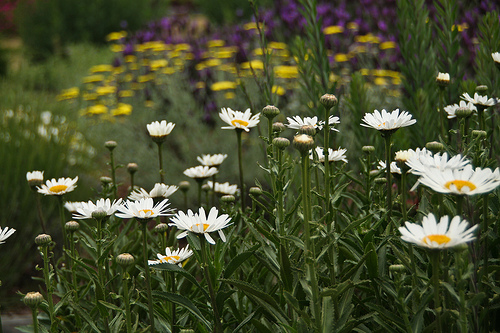

daisy


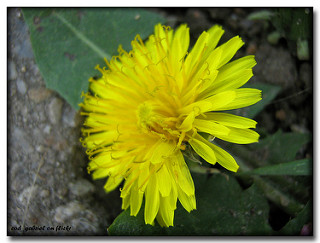

dandelion


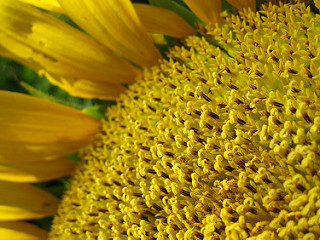

sunflower


In [0]:
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    return preprocess_input(img_array)

random.shuffle(img_locations)
imgs = read_and_prep_images(img_locations)
predictions = model.predict_classes(imgs)
classes = dict((v,k) for k,v in train_generator.class_indices.items())

for img, prediction in zip(img_locations, predictions):
    display(Image(img))
    print(classes[prediction])

In [0]:
ain